# Cluster by accessory gene expression

This notebook is visualizing the expression of accessory genes in the PAO1 and PA14 compendia

In [1]:
import os
import pandas as pd
import plotnine as pn
from core_acc_modules import paths_explore, utils

## Load data

Raw data was processed in an external repository by a member of the Hogan lab: https://github.com/hoganlab-dartmouth/pa-seq-compendia

The basic processing steps to process the data were as follows:
1. _P. aeruginosa_ transcriptome data was downloaded from SRA (~4K samples)
2. Aligned and quantified samples using Salmon against PAO1 and PA14 references
3. Quantified results were validated by performing a differential expression analysis and comparing the DEGs against the original publication.
4. Samples were removed if the average expression was below <--Ask Georgia after Monday-->

_Note:_
* Not sure yet where this data will permanently be stored but there are plans to share it. Currently this is being housed locally to run this analysis

In [2]:
# Expression data files
pao1_expression_filename = paths_explore.PAO1_GE
pa14_expression_filename = paths_explore.PA14_GE

# File containing table to map sample id to strain name
sample_to_strain_filename = paths_explore.SAMPLE_TO_STRAIN

In [3]:
# Load expression data
# Matrices will be sample x gene after taking the transpose
pao1_expression = pd.read_csv(pao1_expression_filename, index_col=0, header=0).T

pa14_expression = pd.read_csv(
    pa14_expression_filename, index_col=0, header=0, usecols=lambda c: c != "Unnamed: 0"
).T

In [4]:
print(pao1_expression.shape)
pao1_expression.head()

(2643, 5542)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,PA1905,PA0195,PA4812
ERX541571.ERX541571.salmon,186.695122,41.039911,52.686904,42.559606,11.827122,49.681780,15.112466,18.976053,39.794426,7.900165,...,20.460662,165.538113,5.101162,7.354804,180.868854,167.755626,1174.719474,0.0,5.164847,8.341849
ERX541572.ERX541572.salmon,200.587013,36.649969,65.542546,40.107206,15.097534,38.910338,9.278816,13.337423,35.813993,4.297894,...,16.972837,147.446686,4.353317,10.276764,136.117254,182.862481,1130.502692,0.0,4.027646,8.112304
ERX541573.ERX541573.salmon,111.420301,27.414821,56.013724,25.265883,18.695233,22.617726,7.280330,8.250733,22.800384,2.722965,...,6.927378,25.827337,4.859923,10.523458,39.615311,110.038822,1290.186481,0.0,3.555782,8.703870
ERX541574.ERX541574.salmon,143.320052,34.477270,83.451742,39.379652,23.225823,30.078262,12.387823,11.166558,26.434305,7.745614,...,13.251025,42.310390,7.593869,14.282697,75.372585,165.789692,1400.630035,0.0,7.795966,9.475629
ERX541575.ERX541575.salmon,118.398324,34.014014,73.732421,32.213593,21.246915,23.149103,6.744427,13.006638,33.648941,4.743275,...,15.714572,39.230322,10.640432,13.123357,62.968437,191.200221,2338.180770,0.0,5.569379,9.570548


In [5]:
print(pa14_expression.shape)
pa14_expression.head()

(2852, 5891)


Name,PA14_55610,PA14_55600,PA14_55590,PA14_55580,PA14_55570,PA14_55560,PA14_55550,PA14_55540,PA14_55530,PA14_55520,...,PA14_19205,PA14_17675,PA14_67975,PA14_36345,PA14_43405,PA14_38825,PA14_24245,PA14_28895,PA14_55117,PA14_59845
ERX541571/ERX541571.salmon,7.649000,5.199463,0.000000,0.603840,3.251456,2.072430,4.737410,9.295218,14.782939,0.799833,...,12.961391,59.317551,216.061670,15.634424,62.094500,12.247810,485.022917,7.891714,20.544727,0.0
ERX541572/ERX541572.salmon,9.079935,5.327690,1.818162,2.992955,8.575610,2.013074,2.627950,11.847593,20.802754,1.046103,...,22.146118,83.642721,201.194838,21.102779,90.796112,77.917983,643.011166,13.042572,18.063102,0.0
ERX541573/ERX541573.salmon,8.198436,5.348838,5.746934,6.514637,4.442881,4.598464,1.409910,11.535072,15.801185,3.560806,...,22.562531,113.387292,140.009994,8.235107,17.632431,75.567561,989.102490,15.962813,11.427848,0.0
ERX541574/ERX541574.salmon,10.230230,1.517369,2.205433,3.784424,2.168788,4.430326,2.523129,9.354983,18.892611,2.666143,...,28.663954,120.056313,179.670570,8.442577,20.247037,72.908551,1107.972700,24.730362,28.145352,0.0
ERX541575/ERX541575.salmon,8.835363,5.100128,2.704275,7.348352,4.388744,3.053679,0.652771,7.405350,11.497184,1.663036,...,14.601112,125.628568,111.880470,7.184447,16.427163,58.668438,720.376371,17.073250,24.750233,0.0


In [6]:
# Load metadata
# Set index to experiment id, which is what we will use to map to expression data
sample_to_strain_table_full = pd.read_csv(sample_to_strain_filename, index_col=2)
sample_to_strain_table_full.head()

,Unnamed: 0,Run,Sample.Name,SRA_study,BioProject,GEO_Accession..exp.,source_name,Strain,PAO1,PA14,PAK,ClinicalIsolate
Experiment,,,,,,,,,,,,
SRX5057740,1,SRR8239475,CLJ1,SRP170343,PRJNA383797,NaN,NaN,CLJ1,False,False,False,False
SRX5057739,2,SRR8239476,CLJ1,SRP170343,PRJNA383797,NaN,NaN,CLJ1,False,False,False,False
SRX5057910,3,SRR8239645,CLJ3,SRP170410,PRJNA383798,NaN,NaN,CLJ3,False,False,False,False
SRX5057909,4,SRR8239646,CLJ3,SRP170410,PRJNA383798,NaN,NaN,CLJ3,False,False,False,False
SRX3573046,5,SRR6483189,PAO1 samples from Colistin/Doripenem treatment,SRP130183,PRJNA414673,NaN,NaN,PAO1,True,False,False,False


## Process data

In [7]:
# Format expression data indices so that values can be mapped to `sample_to_strain_table`
pao1_index_processed = pao1_expression.index.str.split(".").str[0]
pa14_index_processed = pa14_expression.index.str.split("/").str[0]

pao1_expression.index = pao1_index_processed
pa14_expression.index = pa14_index_processed

In [8]:
pao1_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,PA1905,PA0195,PA4812
ERX541571,186.695122,41.039911,52.686904,42.559606,11.827122,49.681780,15.112466,18.976053,39.794426,7.900165,...,20.460662,165.538113,5.101162,7.354804,180.868854,167.755626,1174.719474,0.0,5.164847,8.341849
ERX541572,200.587013,36.649969,65.542546,40.107206,15.097534,38.910338,9.278816,13.337423,35.813993,4.297894,...,16.972837,147.446686,4.353317,10.276764,136.117254,182.862481,1130.502692,0.0,4.027646,8.112304
ERX541573,111.420301,27.414821,56.013724,25.265883,18.695233,22.617726,7.280330,8.250733,22.800384,2.722965,...,6.927378,25.827337,4.859923,10.523458,39.615311,110.038822,1290.186481,0.0,3.555782,8.703870
ERX541574,143.320052,34.477270,83.451742,39.379652,23.225823,30.078262,12.387823,11.166558,26.434305,7.745614,...,13.251025,42.310390,7.593869,14.282697,75.372585,165.789692,1400.630035,0.0,7.795966,9.475629
ERX541575,118.398324,34.014014,73.732421,32.213593,21.246915,23.149103,6.744427,13.006638,33.648941,4.743275,...,15.714572,39.230322,10.640432,13.123357,62.968437,191.200221,2338.180770,0.0,5.569379,9.570548


In [9]:
pa14_expression.head()

Name,PA14_55610,PA14_55600,PA14_55590,PA14_55580,PA14_55570,PA14_55560,PA14_55550,PA14_55540,PA14_55530,PA14_55520,...,PA14_19205,PA14_17675,PA14_67975,PA14_36345,PA14_43405,PA14_38825,PA14_24245,PA14_28895,PA14_55117,PA14_59845
ERX541571,7.649000,5.199463,0.000000,0.603840,3.251456,2.072430,4.737410,9.295218,14.782939,0.799833,...,12.961391,59.317551,216.061670,15.634424,62.094500,12.247810,485.022917,7.891714,20.544727,0.0
ERX541572,9.079935,5.327690,1.818162,2.992955,8.575610,2.013074,2.627950,11.847593,20.802754,1.046103,...,22.146118,83.642721,201.194838,21.102779,90.796112,77.917983,643.011166,13.042572,18.063102,0.0
ERX541573,8.198436,5.348838,5.746934,6.514637,4.442881,4.598464,1.409910,11.535072,15.801185,3.560806,...,22.562531,113.387292,140.009994,8.235107,17.632431,75.567561,989.102490,15.962813,11.427848,0.0
ERX541574,10.230230,1.517369,2.205433,3.784424,2.168788,4.430326,2.523129,9.354983,18.892611,2.666143,...,28.663954,120.056313,179.670570,8.442577,20.247037,72.908551,1107.972700,24.730362,28.145352,0.0
ERX541575,8.835363,5.100128,2.704275,7.348352,4.388744,3.053679,0.652771,7.405350,11.497184,1.663036,...,14.601112,125.628568,111.880470,7.184447,16.427163,58.668438,720.376371,17.073250,24.750233,0.0


In [10]:
# Aggregate boolean labels into a single strain label
aggregated_label = []
for exp_id in list(sample_to_strain_table_full.index):
    if sample_to_strain_table_full.loc[exp_id, "PAO1"].all() == True:
        aggregated_label.append("PAO1")
    elif sample_to_strain_table_full.loc[exp_id, "PA14"].all() == True:
        aggregated_label.append("PA14")
    elif sample_to_strain_table_full.loc[exp_id, "PAK"].all() == True:
        aggregated_label.append("PAK")
    elif sample_to_strain_table_full.loc[exp_id, "ClinicalIsolate"].all() == True:
        aggregated_label.append("Clinical Isolate")
    else:
        aggregated_label.append("NA")

sample_to_strain_table_full["Strain type"] = aggregated_label

sample_to_strain_table = sample_to_strain_table_full["Strain type"].to_frame()

In [11]:
sample_to_strain_table.head()

,Strain type
Experiment,
SRX5057740,NA
SRX5057739,NA
SRX5057910,NA
SRX5057909,NA
SRX3573046,PAO1


In [12]:
# What are the NA strains?
print(sample_to_strain_table.shape)
na_sample_ids = list(
    sample_to_strain_table[sample_to_strain_table["Strain type"] == "NA"].index
)
print(len(na_sample_ids))

(3013, 1)
831


In [13]:
# Most of these strains don't have strain annotation available
sample_to_strain_table_full.loc[na_sample_ids, "Strain"].isnull().sum()

579

In [14]:
# Use to manually lookup these experiments in SRA
# sample_to_strain_table_full.loc[na_sample_ids, "Strain"]

In [15]:
pao1_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,PA1905,PA0195,PA4812
ERX541571,186.695122,41.039911,52.686904,42.559606,11.827122,49.681780,15.112466,18.976053,39.794426,7.900165,...,20.460662,165.538113,5.101162,7.354804,180.868854,167.755626,1174.719474,0.0,5.164847,8.341849
ERX541572,200.587013,36.649969,65.542546,40.107206,15.097534,38.910338,9.278816,13.337423,35.813993,4.297894,...,16.972837,147.446686,4.353317,10.276764,136.117254,182.862481,1130.502692,0.0,4.027646,8.112304
ERX541573,111.420301,27.414821,56.013724,25.265883,18.695233,22.617726,7.280330,8.250733,22.800384,2.722965,...,6.927378,25.827337,4.859923,10.523458,39.615311,110.038822,1290.186481,0.0,3.555782,8.703870
ERX541574,143.320052,34.477270,83.451742,39.379652,23.225823,30.078262,12.387823,11.166558,26.434305,7.745614,...,13.251025,42.310390,7.593869,14.282697,75.372585,165.789692,1400.630035,0.0,7.795966,9.475629
ERX541575,118.398324,34.014014,73.732421,32.213593,21.246915,23.149103,6.744427,13.006638,33.648941,4.743275,...,15.714572,39.230322,10.640432,13.123357,62.968437,191.200221,2338.180770,0.0,5.569379,9.570548


## Get core and accessory genes

In [16]:
# Get mapping between PAO1 and PA14 genes using PAO1 reference
gene_annot_file = paths_explore.GENE_PAO1_ANNOT
gene_mapping_pao1 = utils.get_pao1_pa14_gene_map(gene_annot_file, "pao1")

In [17]:
# Get mapping between PAO1 and PA14 genes using PA14 reference
gene_annot_file = paths_explore.GENE_PA14_ANNOT
gene_mapping_pa14 = utils.get_pao1_pa14_gene_map(gene_annot_file, "pa14")

In [18]:
# Get core genes: genes that have a homolog between PAO1 and PA14
core_pao1_genes, core_pa14_genes = utils.get_core_genes(
    gene_mapping_pao1, gene_mapping_pa14, False
)
print(f"Number of PAO1 core genes: {len(core_pao1_genes)}")
print(f"Number of PA14 core genes: {len(core_pa14_genes)}")

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363


In [19]:
# Select only core genes that are included in my dataset
pao1_ref_genes = pao1_expression.columns
my_core_pao1_genes = list(set(core_pao1_genes).intersection(pao1_ref_genes))

print(f"Number of PAO1 core genes in my dataset: {len(my_core_pao1_genes)}")

Number of PAO1 core genes in my dataset: 5347


In [20]:
# Select only core genes that are included in my dataset
pa14_ref_genes = pa14_expression.columns
my_core_pa14_genes = list(set(core_pa14_genes).intersection(pa14_ref_genes))

print(f"Number of PA14 core genes in my dataset: {len(my_core_pa14_genes)}")

Number of PA14 core genes in my dataset: 5361


In [21]:
# Get PAO1-specific genes
pao1_acc = list(set(pao1_ref_genes) - set(my_core_pao1_genes))
print(f"Number of PAO1-specific genes: {len(pao1_acc)}")

Number of PAO1-specific genes: 195


In [22]:
## TO DO: Get PA14-specific genes
pa14_acc = list(set(pa14_ref_genes) - set(my_core_pa14_genes))
print(f"Number of PA14-specific genes: {len(pa14_acc)}")

Number of PA14-specific genes: 530


## Create df for plotting

In [23]:
# Merge strain to expression matrix
pao1_expression_label = pao1_expression.merge(
    sample_to_strain_table, left_index=True, right_index=True
)
pa14_expression_label = pa14_expression.merge(
    sample_to_strain_table, left_index=True, right_index=True
)

pao1_expression_label.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,PA1905,PA0195,PA4812,Strain type
ERX1272616,303.826480,338.798463,465.776736,397.257001,123.078091,116.111523,27.610111,92.395292,120.099900,65.326674,...,168.169859,23.138030,58.928691,260.231260,1323.578937,6059.532896,13.698890,27.208280,92.897408,NA
ERX1272617,330.188128,396.435115,355.405558,510.353814,122.091321,97.415917,54.699405,136.762773,120.482711,69.593926,...,163.101015,15.704171,71.869733,273.595712,1244.325776,2620.401866,16.799671,38.574501,83.011113,NA
ERX1272618,135.018084,243.605396,387.460819,326.782818,62.510535,87.833830,100.756700,41.063837,25.433769,47.192284,...,122.390258,49.767459,58.247763,55.981788,245.337335,529.675173,19.927484,89.811363,1060.364795,NA
ERX1272619,137.159753,244.026373,439.473818,339.497122,56.730307,85.735486,101.119799,48.401275,28.088254,46.424824,...,125.392957,60.934627,51.455769,57.121504,257.340534,568.755424,17.654271,94.405924,999.594166,NA
ERX1296067,140.569621,88.756402,146.912932,92.253507,68.501598,188.014499,51.126221,48.818981,90.722549,75.285695,...,94.791314,45.695324,42.193072,119.194907,192.236748,3192.612179,55.157209,318.793461,127.164082,NA


In [24]:
## Don't take median..just plot raw expression...???
# Create dataframe with columns:
# core gene ids | median core expression | strain label

# PAO1
pao1_core_expression_label = pao1_expression_label[my_core_pao1_genes + ["Strain type"]]
pao1_core_expression = pao1_expression_label[my_core_pao1_genes]
pao1_core_expression_label["median core expression"] = pao1_core_expression.median(
    axis=1
)

# PA14
pa14_core_expression_label = pa14_expression_label[my_core_pa14_genes + ["Strain type"]]
pa14_core_expression = pa14_expression_label[my_core_pa14_genes]
pa14_core_expression_label["median core expression"] = pa14_core_expression.median(
    axis=1
)

pao1_core_expression_label.head()

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,PA0881,PA3192,PA0414,PA1327,PA4870,PA0312,PA0291,PA4997,PA0898,PA4964,...,PA1286,PA2193,PA0189,PA2065,PA4205,PA1583,PA4181,PA1194,Strain type,median core expression
ERX1272616,41.527077,148.517418,89.354246,24.684215,191.418003,118.636538,802.883849,186.170259,37.771427,133.055533,...,2.036820,40.007035,3.090696,6.959056,9.963895,912.439763,6.627001,11.633263,NA,45.606943
ERX1272617,8.387768,141.410571,126.691394,41.014672,258.358832,146.416680,691.698128,213.575531,111.127719,144.209745,...,3.505577,58.153917,3.963087,6.284976,9.228419,1386.684911,9.297511,14.115850,NA,54.746786
ERX1272618,49.802616,63.138705,51.536416,145.744982,610.048173,322.453262,143.627076,105.404252,38.962701,139.502307,...,12.063661,3.360216,17.644081,15.169030,41.830245,245.172313,18.038006,15.590646,NA,67.940900
ERX1272619,51.108427,59.193832,40.406751,151.885808,582.844507,314.682905,142.527381,129.428721,32.148273,130.825988,...,11.669832,2.255841,18.302694,19.563504,41.143670,267.742987,19.840453,16.878741,NA,67.475342
ERX1296067,26.763363,32.099336,41.016354,60.443992,302.965531,116.911987,85.487272,137.596243,41.232846,88.636567,...,33.706651,189.079601,33.095704,24.817753,77.328598,233.872548,42.640326,53.741500,NA,64.065132


In [25]:
pa14_core_expression_label.head()

,PA14_51100,PA14_08390,PA14_01680,PA14_69110,PA14_54390,PA14_22450,PA14_49330,PA14_64220,PA14_28350,PA14_18660,...,PA14_49160,PA14_39110,PA14_51730,PA14_72070,PA14_14440,PA14_40280,PA14_17370,PA14_66040,Strain type,median core expression
ERX1272616,5.228902,122.501531,2.585614,152.264158,309.694316,70.532514,26.862668,58.371061,73.371333,18.809673,...,44.619896,111.519250,362.986367,317.318169,113.367941,61.347260,59.221417,17.436542,NA,41.409632
ERX1272617,8.968268,92.727105,3.964268,170.323114,392.423351,79.633727,44.850150,105.231074,82.437431,22.954304,...,72.067169,80.609162,477.934440,254.833207,156.495389,87.661620,52.141369,24.677723,NA,53.904251
ERX1272618,15.887926,63.594185,16.021195,288.115014,172.543215,113.126011,44.187490,29.329880,141.409670,31.538047,...,66.153897,90.711479,117.175909,308.740688,53.701351,191.029520,27.356586,190.041779,NA,64.120510
ERX1272619,13.761078,57.056082,17.173927,317.321099,175.760026,127.421780,39.719541,25.366051,121.493159,32.556597,...,56.420163,99.219076,100.815862,259.384403,57.465381,182.966413,26.785536,180.855581,NA,63.276096
ERX1296067,87.292401,128.504447,39.968817,53.389629,145.902125,135.664174,69.290241,35.653557,60.841578,99.250482,...,69.543920,81.019795,247.636789,200.544577,72.867561,116.548855,108.640971,47.206537,NA,71.066616


In [26]:
# Merge PAO1 and PA14 core dataframes
pao1_pa14_core_expression_label = pao1_core_expression_label.merge(
    pa14_core_expression_label,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_core_expression_label.head()

,PA0881,PA3192,PA0414,PA1327,PA4870,PA0312,PA0291,PA4997,PA0898,PA4964,...,PA14_49160,PA14_39110,PA14_51730,PA14_72070,PA14_14440,PA14_40280,PA14_17370,PA14_66040,Strain type_pa14,median core expression_pa14
ERX1272616,41.527077,148.517418,89.354246,24.684215,191.418003,118.636538,802.883849,186.170259,37.771427,133.055533,...,44.619896,111.519250,362.986367,317.318169,113.367941,61.347260,59.221417,17.436542,NA,41.409632
ERX1272617,8.387768,141.410571,126.691394,41.014672,258.358832,146.416680,691.698128,213.575531,111.127719,144.209745,...,72.067169,80.609162,477.934440,254.833207,156.495389,87.661620,52.141369,24.677723,NA,53.904251
ERX1272618,49.802616,63.138705,51.536416,145.744982,610.048173,322.453262,143.627076,105.404252,38.962701,139.502307,...,66.153897,90.711479,117.175909,308.740688,53.701351,191.029520,27.356586,190.041779,NA,64.120510
ERX1272619,51.108427,59.193832,40.406751,151.885808,582.844507,314.682905,142.527381,129.428721,32.148273,130.825988,...,56.420163,99.219076,100.815862,259.384403,57.465381,182.966413,26.785536,180.855581,NA,63.276096
ERX1296067,26.763363,32.099336,41.016354,60.443992,302.965531,116.911987,85.487272,137.596243,41.232846,88.636567,...,69.543920,81.019795,247.636789,200.544577,72.867561,116.548855,108.640971,47.206537,NA,71.066616


In [27]:
# Create dataframe with columns:
# accessory gene ids | median accessory expression | strain label

# PAO1
pao1_acc_expression_label = pao1_expression_label[pao1_acc + ["Strain type"]]
pao1_acc_expression = pao1_expression_label[pao1_acc]
pao1_acc_expression_label["median acc expression"] = pao1_acc_expression.median(axis=1)

# PA14
pa14_acc_expression_label = pa14_expression_label[pa14_acc + ["Strain type"]]
pa14_acc_expression = pa14_expression_label[pa14_acc]
pa14_acc_expression_label["median acc expression"] = pa14_acc_expression.median(axis=1)

pao1_acc_expression_label.head()

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,PA3147,PA5149,PA4191,PA3512,PA3157,PA0983,PA2184,PA3154,PA4541,PA4101,...,PA5264,PA4106,PA2073,PA2104,PA0643,PA1393,PA2734,PA3218,Strain type,median acc expression
ERX1272616,0.000000,43.992184,17.090922,14.111403,0.000000,0.0,8.149375,0.000000,12.994322,0.000000,...,77.791565,0.000000,5.491480,0.000000,0.000000,0.000000,0.000000,3.329834,NA,9.090024
ERX1272617,0.000000,69.781455,29.279976,22.223629,0.000000,0.0,8.239370,0.000000,13.786304,0.000000,...,57.539313,0.000000,7.833821,0.000000,0.000000,0.000000,0.000000,5.697920,NA,10.175944
ERX1272618,0.000000,89.805650,7.664758,32.380105,0.000000,0.0,26.244155,0.000000,34.539690,0.000000,...,193.552484,0.000000,14.770810,0.000000,0.000000,0.000000,0.000000,10.736211,NA,17.745880
ERX1272619,0.000000,81.543089,5.417482,27.736497,0.000000,0.0,21.626766,0.000000,33.110671,0.000000,...,240.179832,0.000000,14.416287,0.000000,0.000000,0.000000,0.000000,11.561310,NA,15.337414
ERX1296067,0.140608,80.009477,69.871709,0.000000,0.034035,0.0,76.292293,0.174588,49.170085,36.893635,...,314.193434,43.218582,46.055871,1.148081,0.062614,0.369382,0.101203,39.225322,NA,17.061481


In [28]:
pa14_acc_expression_label.head()

,PA14_30860,PA14_59200,PA14_61340,PA14_40340,PA14_59860,PA14_31170,PA14_54910,PA14_66875,PA14_15510,PA14_71830,...,PA14_58990,PA14_40470,PA14_28470,PA14_01130,PA14_15445,PA14_59900,PA14_15620,PA14_54880,Strain type,median acc expression
ERX1272616,0.000000,68.794535,37.394416,85.014882,7.630158,0.0,0.000000,820.746211,0.0,45.536480,...,6.854482,0.000000,98.419029,0.0,0.0,17.517707,0.000000,0.0,NA,0.000000
ERX1272617,0.000000,42.439508,54.286609,52.990755,5.062156,0.0,0.000000,1031.726903,0.0,59.424347,...,7.978270,0.000000,61.778456,0.0,0.0,19.059014,0.000000,0.0,NA,0.000000
ERX1272618,0.000000,74.569579,193.160587,59.137235,11.799389,0.0,0.000000,697.832326,0.0,33.267138,...,10.004632,0.000000,60.794707,0.0,0.0,22.201023,0.000000,0.0,NA,0.000000
ERX1272619,0.000000,73.180503,171.608678,43.302542,7.633565,0.0,0.000000,718.119690,0.0,31.293090,...,8.037109,0.000000,51.205896,0.0,0.0,19.071665,0.000000,0.0,NA,0.000000
ERX1296067,0.191834,0.000000,67.385939,258.619272,0.000000,0.0,0.090589,738.176566,0.0,46.744228,...,0.034409,0.145508,159.362821,0.0,0.0,0.893193,0.094146,0.0,NA,0.111727


In [29]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_expression_label = pao1_acc_expression_label.merge(
    pa14_acc_expression_label,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_acc_expression_label.head()

,PA3147,PA5149,PA4191,PA3512,PA3157,PA0983,PA2184,PA3154,PA4541,PA4101,...,PA14_58990,PA14_40470,PA14_28470,PA14_01130,PA14_15445,PA14_59900,PA14_15620,PA14_54880,Strain type_pa14,median acc expression_pa14
ERX1272616,0.000000,43.992184,17.090922,14.111403,0.000000,0.0,8.149375,0.000000,12.994322,0.000000,...,6.854482,0.000000,98.419029,0.0,0.0,17.517707,0.000000,0.0,NA,0.000000
ERX1272617,0.000000,69.781455,29.279976,22.223629,0.000000,0.0,8.239370,0.000000,13.786304,0.000000,...,7.978270,0.000000,61.778456,0.0,0.0,19.059014,0.000000,0.0,NA,0.000000
ERX1272618,0.000000,89.805650,7.664758,32.380105,0.000000,0.0,26.244155,0.000000,34.539690,0.000000,...,10.004632,0.000000,60.794707,0.0,0.0,22.201023,0.000000,0.0,NA,0.000000
ERX1272619,0.000000,81.543089,5.417482,27.736497,0.000000,0.0,21.626766,0.000000,33.110671,0.000000,...,8.037109,0.000000,51.205896,0.0,0.0,19.071665,0.000000,0.0,NA,0.000000
ERX1296067,0.140608,80.009477,69.871709,0.000000,0.034035,0.0,76.292293,0.174588,49.170085,36.893635,...,0.034409,0.145508,159.362821,0.0,0.0,0.893193,0.094146,0.0,NA,0.111727


## Plot: core genome

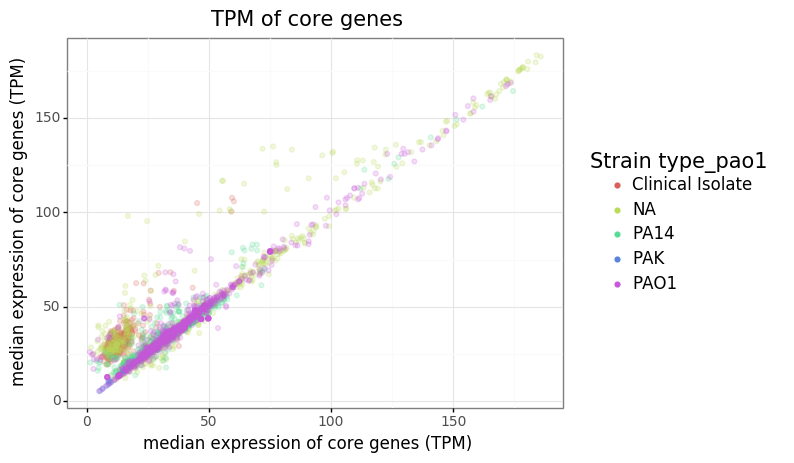

<ggplot: (8750345647517)>


In [35]:
# Plot
fig = pn.ggplot(
    pao1_pa14_core_expression_label,
    pn.aes(x="median core expression_pao1", y="median core expression_pa14"),
)
fig += pn.geom_point(pn.aes(color="Strain type_pao1"), alpha=0.2)
fig += pn.labs(
    x="median expression of core genes (TPM)",
    y="median expression of core genes (TPM)",
    title="TPM of core genes",
)
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)

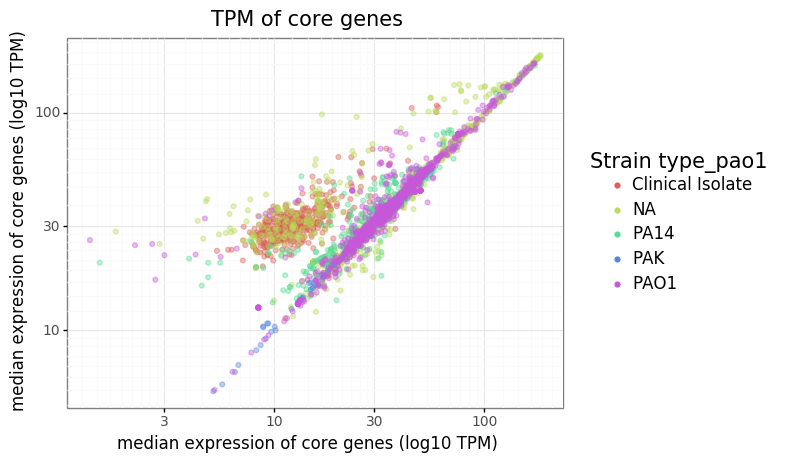

<ggplot: (8750345465489)>


In [31]:
# Plot log-scaled
fig2 = pn.ggplot(
    pao1_pa14_core_expression_label,
    pn.aes(x="median core expression_pao1", y="median core expression_pa14"),
)
fig2 += pn.scales.scale_x_log10()
fig2 += pn.scales.scale_y_log10()
fig2 += pn.geom_point(pn.aes(color="Strain type_pao1"), alpha=0.4)
fig2 += pn.labs(
    x="median expression of core genes (log10 TPM)",
    y="median expression of core genes (log10 TPM)",
    title="TPM of core genes",
)
fig2 += pn.theme_bw()
fig2 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig2 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))


print(fig2)

## Plot: accessory genome

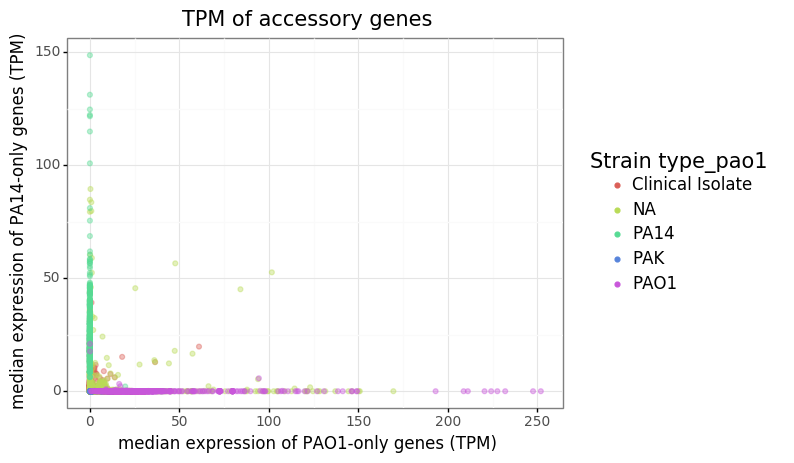

<ggplot: (8750345465561)>


In [32]:
# Plot
fig3 = pn.ggplot(
    pao1_pa14_acc_expression_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig3 += pn.geom_point(pn.aes(color="Strain type_pao1"), alpha=0.4)
fig3 += pn.labs(
    x="median expression of PAO1-only genes (TPM)",
    y="median expression of PA14-only genes (TPM)",
    title="TPM of accessory genes",
)
fig3 += pn.theme_bw()
fig3 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig3 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig3)

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/plotnine/scales/scale.py:549: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


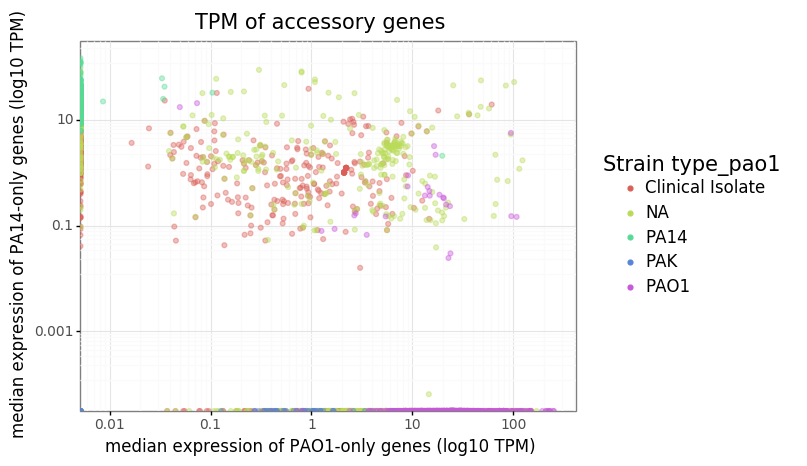

<ggplot: (8750345225169)>


In [33]:
# Plot log-scaled
fig4 = pn.ggplot(
    pao1_pa14_acc_expression_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig4 += pn.scales.scale_x_log10()
fig4 += pn.scales.scale_y_log10()
fig4 += pn.geom_point(pn.aes(color="Strain type_pao1"), alpha=0.4)
fig4 += pn.labs(
    x="median expression of PAO1-only genes (log10 TPM)",
    y="median expression of PA14-only genes (log10 TPM)",
    title="TPM of accessory genes",
)
fig4 += pn.theme_bw()
fig4 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig4 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))


print(fig4)

**Note:**
We can compare TPM between PAO1 and PA14 if they have similar total number of reads mapped. So perhaps we can compare PAO1 and PA14 compendia. See Georgia’s [google doc](https://docs.google.com/document/d/1OnvJNVkhK5ATnhHaeSmz8Ze_Iw9ixXhfSxAL_BSqbuM/edit)

**Takeaway:**
* This is a positive control that PAO1 annotated samples have higher median expression of PAO1-only genes compared to PA14-only genes. And similarly, PA14 annotated samples have higher median expression of PA14-only genes compared to PAO1-only genes. In other words, we expect that PA14-only genes will have either 0 or very low values in PAO1 samples and vice versa.

* This result also shows that we can anticipate a very clear binning of our samples into PAO1 and PA14 if we use mapping rates.

* Note: The NA strains are those where the strain information was not available in the metadata. By a quick manual spot check it looks like a bunch were clinical isolates (which is good since these NA seem to cluster with other clinical isolates).

### How many samples have a very low or 0 expression?

In [34]:
# Total number of PAO1 samples

# Total number of PA14 samples

# Of those samples, how many have expression that is below ...

### Examine samples on the diagonal
* Curious about the samples that have expression of both PAO1 and PA14 specific genes. Mostly clinical isolates, but some PAO1 and PA14 samples.
* Our binning will likely remove these samples, so we just want to make sure we know who they are before we do

### Other observations
* PA14 seem to have more clinical isolates
* PAK and PAO1 closer, is that expected?
* Why is range of PA14 and PAO1 different?